# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
ids = list(range(1,11))

In [3]:
data_={'StudentID': ids, 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]}
df1=pd.DataFrame(data_)
df1

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


In [4]:
df = df1.copy()

In [5]:
df.drop(["StudentID"],axis=1, inplace=True)

Draw a dispersion diagram (scatter plot) for the data.

In [6]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (14, 8)})
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

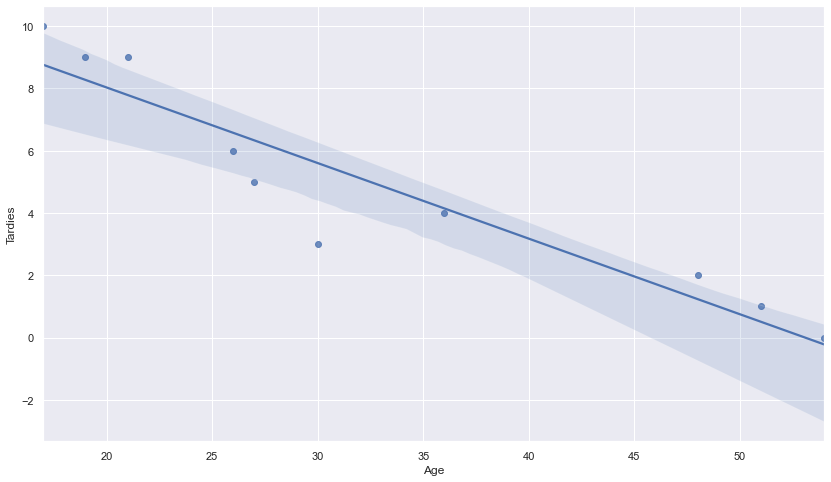

In [7]:
viz1= sns.regplot(x='Age',y='Tardies',data=df)
viz1

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

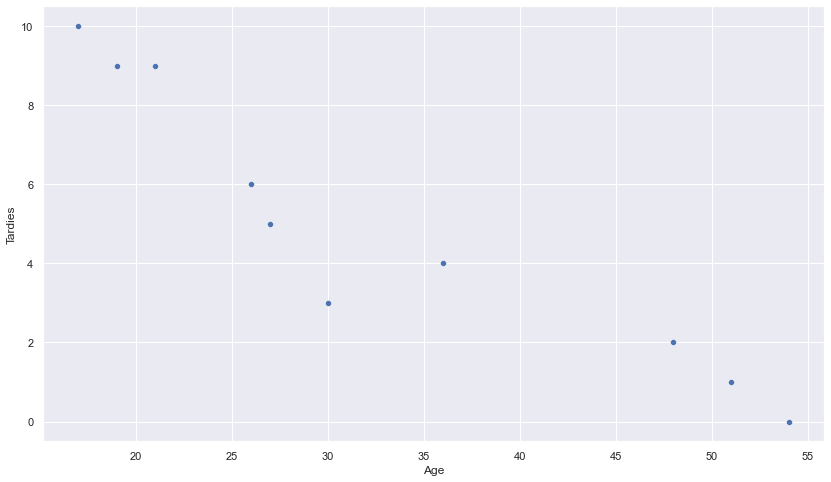

In [8]:
viz2= sns.scatterplot(x='Age',y='Tardies',data=df)
viz2

In [10]:
"""
plt.scatter(x=df.Age, y=df.Tardies)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

plt.figure(figsize=(16,9))
## Line to create the desired plot ##
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.xlim(16,55)
plt.ylim(0,11)
plt.title("How old (and late) are you?")
plt.show()

"""

'\nplt.scatter(x=df.Age, y=df.Tardies)\nplt.xlabel(\'Age\')\nplt.ylabel(\'Tardies\')\nplt.show()\n\nplt.figure(figsize=(16,9))\n## Line to create the desired plot ##\nplt.xlabel("Age")\nplt.ylabel("Tardies")\nplt.xlim(16,55)\nplt.ylim(0,11)\nplt.title("How old (and late) are you?")\nplt.show()\n\n'

In [11]:
"""
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 150
sns.set()
"""

"\nplt.rcParams['figure.figsize'] = (8, 6)\nplt.rcParams['figure.dpi'] = 150\nsns.set()\n"

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

* The data points to a descending linear regression, the younger the student, there is more likelyhood for them to be late.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [12]:
df.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [13]:
df.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [14]:
lr = LinearRegression()
lr.fit(

    X = df[["Age"]], # equiv: df.Age.to_frame()
    y = df.Tardies)

beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

print(beta_1)
print(beta_0)

-0.2428207709159809
12.888803363135771


In [20]:
y_hat = df.Age * beta_1 + beta_0
df["pred"] = (df.Age * beta_1 + beta_0).round(4)
df["error"] = (df.pred - y_hat).abs()
df.error.mean()

3.0333945171281962e-05

In [19]:
df

,Age,Tardies,pred,error
0,17,10,8.7609,0.000050
1,51,1,0.5049,0.000044
2,27,5,6.3326,0.000043
3,21,9,7.7896,0.000033
4,36,4,4.1473,0.000044
5,48,2,1.2334,0.000006
6,19,9,8.2752,0.000009
7,26,6,6.5755,0.000037
8,54,0,-0.2235,0.000018
9,30,3,5.6042,0.000020


Plot your regression model on your scatter plot.

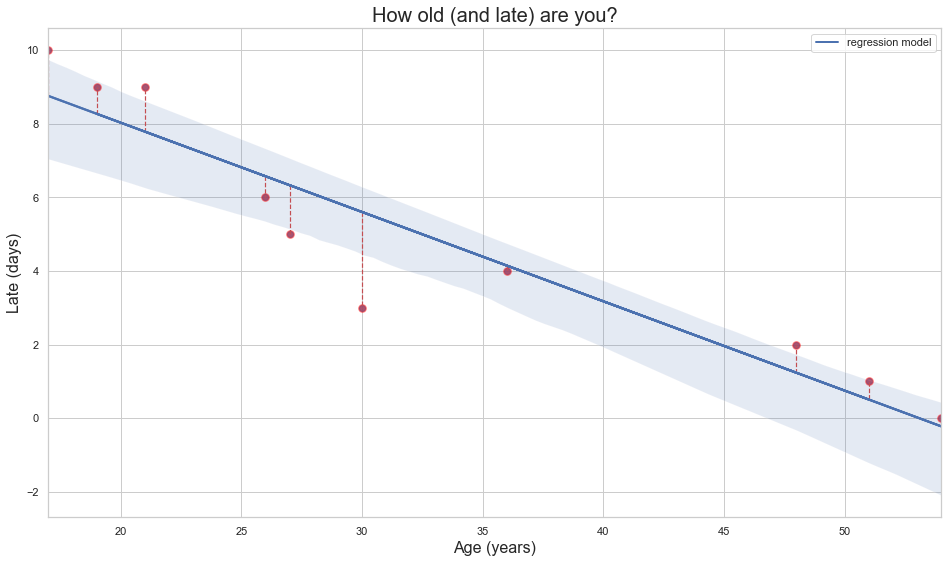

In [21]:
# Vamos a pintar la línea de regresión con el residuo
y_hat = beta_0 + beta_1 * df.Age #Línea de regresión

sns.set_context('poster')
sns.set(rc={'figure.figsize': (16, 9)})
sns.set_style('whitegrid')

#sns.despine(left=True, bottom=True)
sns.regplot(x='Age',y='Tardies', data=df)
plt.scatter(df.Age,df.Tardies, s=60, color='red',alpha = 0.4) # pintar los puntos
plt.plot(df.Age, y_hat, lw=2, color="b", label='regression model') # pintamos la línea de regresión
plt.vlines(df.Age, y_hat, df.Tardies, linestyles='dashed',color="r", lw = 1.2) # pintamos las líneas que van desde los puntos a la línea

plt.title("How old (and late) are you?", size=20)
plt.xlabel("Age (years)", size = 16)
plt.ylabel("Late (days)", size=16)
plt.legend()
plt.show
plt.legend()



<span class="mark">Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.</span>

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [23]:
import statsmodels.formula.api as smf
veh = pd.read_csv ('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [24]:
veh.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [25]:
droppable_cols = ['Make', 'Model', 'Engine Displacement', 'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type', 'City MPG', 'Highway MPG']
veh.drop(droppable_cols,axis=1, inplace=True)
data = veh.rename(columns = {'Fuel Barrels/Year': 'FB_Y', 'Year':'YEAR', 'Cylinders': 'CYL', 'Combined MPG': 'CMB_MPG', 'Fuel Cost/Year':'FC_Y', 'CO2 Emission Grams/Mile':'CO2_GM'})

In [33]:
data.corr().min()

YEAR      -0.222300
CYL       -0.698648
FB_Y      -0.909743
CMB_MPG   -0.926229
CO2_GM    -0.926229
FC_Y      -0.875185
dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'YEAR'),
  Text(1.5, 0, 'CYL'),
  Text(2.5, 0, 'FB_Y'),
  Text(3.5, 0, 'CMB_MPG'),
  Text(4.5, 0, 'CO2_GM'),
  Text(5.5, 0, 'FC_Y')])

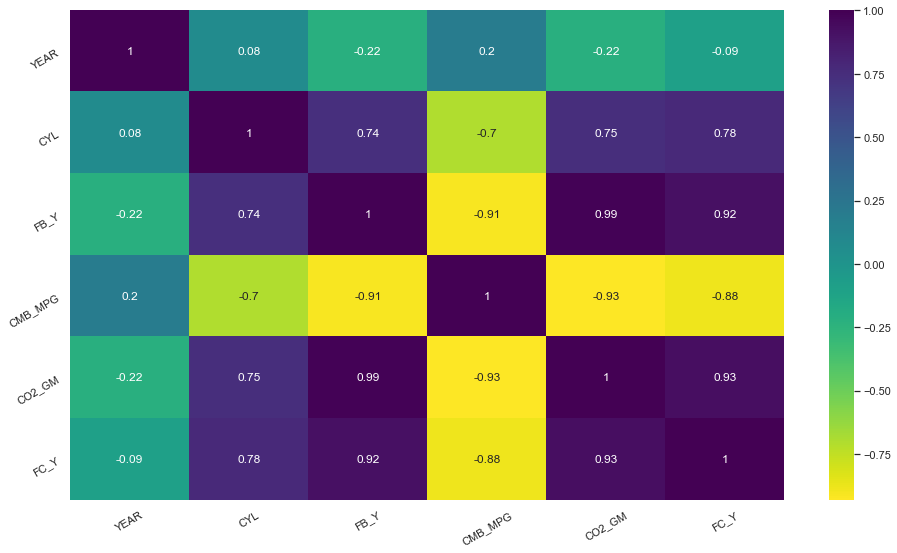

In [83]:
corrmatrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(16, 9), sharey=True)
ax = sns.heatmap(data=corrmatrix, annot=True,cmap='viridis_r') # autumn_r,twilight_r,'ocean''nipy_spectral_r','rainbow',YlGnBu',mako', 'coolwarm', 'rocket','flare','magma', 'rocket_r'
plt.yticks(rotation = 30)
plt.xticks(rotation = 30)


In [37]:
data[['CO2_GM','FB_Y']].corr(method='pearson')

,CO2_GM,FB_Y
CO2_GM,1.000000,0.986189
FB_Y,0.986189,1.000000


In [38]:
data[['CO2_GM','CMB_MPG']].corr(method='pearson')

,CO2_GM,CMB_MPG
CO2_GM,1.000000,-0.926229
CMB_MPG,-0.926229,1.000000


**The heatmat shows a highly meaningful inverse correlation between     
`CO2 Emission Grams/Mile` and `Combined MPG`      
and between       
`CO2 Emission Grams/Mile` and `Fuel Barrels/Year`**

**On the other hand, the variables     
`Year`and `Fuel Cost per Year`     
show the lowest influence on `CO2 Emission Grams/Mile`**

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [13]:
# choosing variable with max correlation: FuelBarrels/Year

In [42]:
data.columns

Index(['YEAR', 'CYL', 'FB_Y', 'CMB_MPG', 'CO2_GM', 'FC_Y'], dtype='object')

In [76]:
res1 = smf.ols('CO2_GM ~ CMB_MPG', data=data).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CO2_GM   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 2.170e+05
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:12:27   Log-Likelihood:            -1.8778e+05
No. Observations:               35952   AIC:                         3.756e+05
Df Residuals:                   35950   BIC:                         3.756e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    905.2031      0.953    950.221      0.000     903.336     907.070
CMB_MPG      -21.5706      0.046   -465.877      0.000     -21.661     -21.480
==============================================================================
Omnibus:                    23856.426   Durbin-Watson:                   0.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380865.584
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      17.770   Cond. No.                         83.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
res2 = smf.ols('CO2_GM ~ FB_Y', data=data).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CO2_GM   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.275e+06
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:12:33   Log-Likelihood:            -1.5821e+05
No. Observations:               35952   AIC:                         3.164e+05
Df Residuals:                   35950   BIC:                         3.164e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4865      0.423     29.523      0.000      11.658      13.316
FB_Y          26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
comb_cmpg = res1.rsquared_adj
comb_fby = res2.rsquared_adj
lst = [comb_cmpg,comb_fby]
max(lst)

0.9725673142814956

**Building up on  `FB_Y` as it has the highest value of rsquared**

In [79]:
res3 = smf.ols('CO2_GM ~ FB_Y + CMB_MPG', data=data).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CO2_GM   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 7.796e+05
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:12:42   Log-Likelihood:            -1.5467e+05
No. Observations:               35952   AIC:                         3.094e+05
Df Residuals:                   35949   BIC:                         3.094e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    162.6698      1.742     93.379      0.000     159.255     166.084
FB_Y          22.1971      0.051    436.726      0.000      22.098      22.297
CMB_MPG       -3.9251      0.044    -88.378      0.000      -4.012      -3.838
==============================================================================
Omnibus:                    79355.158   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        473547972.462
Skew:                          20.487   Prob(JB):                         0.00
Kurtosis:                     563.751   Cond. No.                         493.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
comb_fby_cmpg = res3.rsquared_adj

In [81]:
comb_fby_cmpg - comb_fby

0.004895813927087822

**despite rquared difference being (almost) unsignificant,     
---> model will be created from the influence of      
`Fuel Barrels/Year` and `Combined MPG`on `CO2 Emission Grams/Mile`:**        

**`res3`**

**(p = 0 ) < 0.005 in both cases**

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [82]:
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 CO2_GM   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 7.796e+05
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:13:19   Log-Likelihood:            -1.5467e+05
No. Observations:               35952   AIC:                         3.094e+05
Df Residuals:                   35949   BIC:                         3.094e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    162.6698      1.742     93.379      0.000     159.255     166.084
FB_Y          22.1971      0.051    436.726      0.000      22.098      22.297
CMB_MPG       -3.9251      0.044    -88.378      0.000      -4.012      -3.838
==============================================================================
Omnibus:                    79355.158   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        473547972.462
Skew:                          20.487   Prob(JB):                         0.00
Kurtosis:                     563.751   Cond. No.                         493.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

In [15]:
attendance = pd.DataFrame({'invites': [1, 3, 4, 6, 8, 9, 11, 14], 'attendees': [1, 2, 4, 4, 5, 7, 8, 13]})
attendance

,invites,attendees
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

Text(0.5, 1.0, 'SUSPICIOUS?')

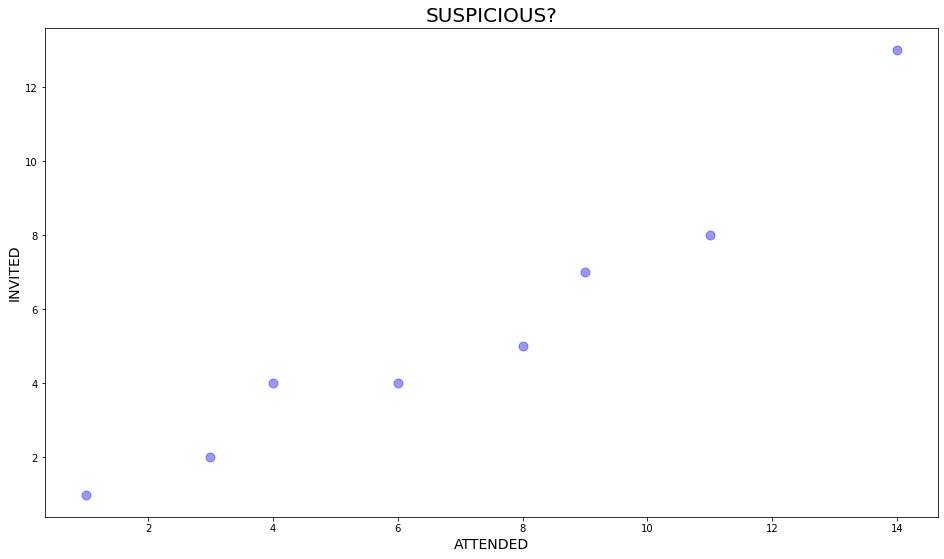

In [34]:
fig, ax = plt.subplots(figsize=(16, 9), sharey=True)

plt.scatter(x = attendance.invites,y=attendance.attendees, s=80, color='b',alpha = 0.4, label= "Presence") 

plt.ylabel("INVITED",size=14)
plt.xlabel("ATTENDED", size=14)
plt.title("SUSPICIOUS?", size=20)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 